In [ ]:
#c2054492

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [ ]:
df = pd.read_csv("Coursework_1_data.csv")

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['VisitorType'] = labelencoder.fit_transform(df['VisitorType'])
df['Month'] = labelencoder.fit_transform(df['Month'])
df['Weekend'] = labelencoder.fit_transform(df["Weekend"])


In [ ]:
from scipy import stats
df_data = df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']]
df_data = df_data.astype("float")
z = np.abs(stats.zscore(df_data))
df_non_outliers = df_data[(z<3).all(axis = 1)]
df_cat = df[['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend', 'Revenue']]
df_final = pd.merge(df_non_outliers, df_cat, left_index=True, right_index=True)
df = df_final.reset_index(drop= True)

In [ ]:
X_num = df.iloc[:,0:10]
X_cat = df.iloc[:,10:17]
y = df.Revenue

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from imblearn.pipeline import Pipeline, make_pipeline

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score

In [ ]:
# Convert categoric data

In [ ]:
categorical_features = ["Month", "OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend"]
X_categorical = df[categorical_features]



In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X_categorical = X_categorical.astype("object")
X_cat = pd.get_dummies(X_categorical)

In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

df_bouncerate_exitrate = df[["ExitRates", "BounceRates"]]
pca_exit_bounce_rate = pca.fit_transform(df_bouncerate_exitrate)

df_productRelated = df[["ProductRelated", "ProductRelated_Duration"]]
pca_product_related = pca.fit_transform(df_productRelated)

df_Informational = df[["Informational", "Informational_Duration"]]
pca_Informational = pca.fit_transform(df_Informational)

df_Administrative = df[["Administrative", "Administrative_Duration"]]
pca_Administrative = pca.fit_transform(df_Administrative)

df = df.drop(["ExitRates", "BounceRates", "ProductRelated", "ProductRelated_Duration"],1)
df["PCA_Exit_Bounce_Rate"] = pca_exit_bounce_rate
df["PCA_Product_Related"] = pca_product_related
df["Pca_Informational"] = pca_Informational
df["Pca_Administrative"] = pca_Administrative

In [ ]:
# Convert numeric data

In [ ]:
numerical_features = ["Pca_Informational", "Pca_Administrative", "PCA_Product_Related", 
                      "PageValues", "SpecialDay", "PCA_Exit_Bounce_Rate"]
X_numerical = df[numerical_features]

In [ ]:
minmaxscaler = MinMaxScaler()
X_num = minmaxscaler.fit_transform(X_numerical)
powertransformer = PowerTransformer(method='yeo-johnson', standardize=True)
X_num = powertransformer.fit_transform(X_num)
X_num = pd.DataFrame(X_num, columns= numerical_features)

In [ ]:
X = pd.concat([X_cat, X_num],1);X

,Month_0,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_0,VisitorType_1,VisitorType_2,Weekend_0,Weekend_1,Pca_Informational,Pca_Administrative,PCA_Product_Related,PageValues,SpecialDay,PCA_Exit_Bounce_Rate
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,-0.429013,-0.875865,-1.279793,-0.480071,-0.271604,1.558190
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,-0.429013,-0.875865,-1.454828,-0.480071,-0.271604,1.990165
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,-0.429013,-0.875865,-0.065987,-0.480071,-0.271604,0.991313
3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,-0.429013,-0.875865,-1.039452,-0.480071,-0.271604,0.168971
4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,-0.429013,-0.875865,0.107271,-0.480071,3.682235,-0.390903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10024,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,-0.429013,1.415240,1.148430,2.147051,-0.271604,0.126401
10025,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,-0.429013,-0.875865,-0.352905,-0.480071,-0.271604,-0.437166
10026,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,-0.429013,-0.875865,-0.964830,-0.480071,-0.271604,1.859966
10027,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,-0.429013,0.816414,-0.593525,-0.480071,-0.271604,-0.451973


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
best_features = ['PageValues', 'PCA_Exit_Bounce_Rate', 'PCA_Product_Related',
       'Pca_Administrative', 'Month_7', 'Pca_Informational',
       'TrafficType_2', 'Month_6', 'VisitorType_2', 'Month_5',
       'OperatingSystems_2', 'Region_1', 'VisitorType_0', 'TrafficType_3',
       'OperatingSystems_3', 'TrafficType_1', 'SpecialDay']

In [ ]:
X = X[best_features]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train = X_train.values
X_test = X_test.values
y_train  = y_train.values
y_test  = y_test.values

In [ ]:
#smote = SMOTE(sampling_strategy=0.5)
#X_train, y_train = smote.fit_resample(X_train, y_train)
rus = RandomUnderSampler(sampling_strategy= 0.8)
X_train, y_train = rus.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
len(y_train[y_train == False])

1367

In [ ]:
len(y_train[y_train == True])

1094

In [ ]:
from sklearn.ensemble import VotingClassifier

knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
lgbm = LGBMClassifier()

Voting_Classifier = VotingClassifier(
    estimators=[('knn', knn), ('rfc', rfc), ('lgbm', lgbm)],
    voting='soft')

In [ ]:
parametreler = [{'votingclassifier__knn__n_neighbors': [10, 25, 50],
                 'votingclassifier__lgbm__n_estimators': [10],
                "votingclassifier__lgbm__learning_rate" : [0.01],
                "votingclassifier__lgbm__max_depth" : [2],
                 'votingclassifier__rfc__n_estimators': [50, 100, 200, 300],
                'votingclassifier__rfc__max_features': ['auto', 'sqrt'],
                'votingclassifier__rfc__bootstrap': [True],
                'votingclassifier__rfc__criterion': ["entropy"]}]

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.metrics import classification_report

imbalance_pipeline = make_pipeline(Voting_Classifier)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) 

grid_imbalance = GridSearchCV(imbalance_pipeline, param_grid=parametreler, cv=cv, scoring='recall',
                        return_train_score=True)

grid_imbalance.fit(X_train, y_train)

y_pred = grid_imbalance.predict(X_test)

In [ ]:
print("*****Voting-UnderSampling-PCA-FeatureSelection-RemoveOutliers****")
print("Validation Recall: {}".format(grid_imbalance.best_score_))

print("Recall Test: {}".format(recall_score(y_test, y_pred)))

print("Precision Test: {}".format(precision_score(y_test, y_pred)))

print("F2 Test: {}".format(fbeta_score(y_test, y_pred,2)))

print("F1 Test: {}".format(fbeta_score(y_test, y_pred,1)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

*****Voting-UnderSampling-PCA-FeatureSelection-RemoveOutliers****
Validation Recall: 0.801718098415346
Recall Test: 0.8158640226628895
Precision Test: 0.5207956600361664
F2 Test: 0.732824427480916
F1 Test: 0.6357615894039734
[[1890  265]
 [  65  288]]
              precision    recall  f1-score   support

       False       0.97      0.88      0.92      2155
        True       0.52      0.82      0.64       353

    accuracy                           0.87      2508
   macro avg       0.74      0.85      0.78      2508
weighted avg       0.90      0.87      0.88      2508



In [ ]:
grid_imbalance.best_params_

{'votingclassifier__knn__n_neighbors': 10,
 'votingclassifier__lgbm__learning_rate': 0.01,
 'votingclassifier__lgbm__max_depth': 2,
 'votingclassifier__lgbm__n_estimators': 10,
 'votingclassifier__rfc__bootstrap': True,
 'votingclassifier__rfc__criterion': 'entropy',
 'votingclassifier__rfc__max_features': 'auto',
 'votingclassifier__rfc__n_estimators': 200}

In [ ]:
fbeta_score(y_test, y_pred, beta = 2)

0.732824427480916

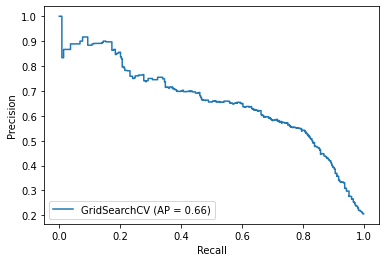

In [ ]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(grid_imbalance ,X_test, y_test)

No Skill ROC AUC 0.518
VotingClassifier ROC AUC 0.916


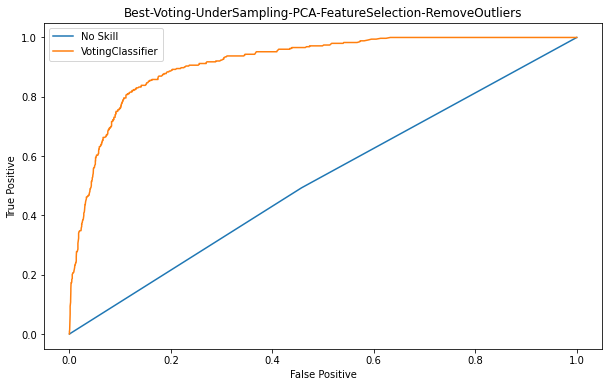

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(test_y, dummy_probs, model_probs):
    plt.figure(figsize=(10,6))
    
    falsep, truep, _ = roc_curve(test_y, dummy_probs)
    plt.plot(falsep, truep, label='No Skill')
    
    falsep, truep, _ = roc_curve(test_y, model_probs)
    plt.plot(falsep, truep, label='VotingClassifier')
    
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.title("Best-Voting-UnderSampling-PCA-FeatureSelection-RemoveOutliers")
    plt.legend()
    plt.show()

model = DummyClassifier(strategy='stratified')
model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)
dummy_probs = y_pred_prob[:, 1]

roc_auc = roc_auc_score(y_test, dummy_probs)
print('No Skill ROC AUC %.3f' % roc_auc)

y_pred_prob = grid_imbalance.predict_proba(X_test)
modelprod = y_pred_prob[:, 1]

roc_auc = roc_auc_score(y_test, modelprod)
print('VotingClassifier ROC AUC %.3f' % roc_auc)

plot_roc_curve(y_test, dummy_probs, modelprod)